# Web Scraping

En este Notebook pondremos en práctica los contenidos incorporados en la Bitácora. Usaremos la librería Selenium y BeautifulSoup para hacer un breve análisis del portal BBC en Español.

Como siempre, hay dos opciones para ejecutar este notebook. Uno es hacerlo en Colab; la otra, en tu computadora. Si utilizas Colab, no debes hacer nada más que correr las celdas correspondientes. Si lo vas a correr en tu computadora, 

>1. En primer lugar, debes instalar Selenium. Te dejamos la documentación necesaria [aquí](https://selenium-python.readthedocs.io/installation.html).
>2. Instala BeautifulSoup (beautifulsoup4).

**Para ejecutar en Colab**

Este bloque de código instala Selenium y permite ejecutar la librería en Google Colab. Lo encontramos en [esta consulta](https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com) de Stack Overflow. 

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0, r'chromedriver.exe')

from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver', chrome_options = chrome_options)

"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"apt" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"cp" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
C:\Users\Erick\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: use options instead of chrome_options
  from ipykernel import kernelapp as app


**Para ejecutar en, por ejemplo, Firefox en tu computadora**

Ten en cuenta que si usas otro navegador debes modificar las celdas de manera apropiada.

Corre las siguientes celdas así como están. Verás que te abre una ventana de tu navegador.

Si esa ventana te molesta, descomenta las intrucciones que hay en la primera celda.

In [2]:
from selenium import webdriver

# Para que abra navegador
wd = webdriver.Chrome()

# Para que NO abra navegador
# firefox_options = webdriver.FirefoxOptions()
# firefox_options.add_argument('--headless')
# wd = webdriver.Firefox(options = firefox_options)

Testeamos si Selenium y el Webdriver están funcionando correctamente. Traemos el html del home.

In [3]:
# Le decimos al Webdriver (wd) que entre a la BBC
wd.get('https://www.bbc.com/mundo/')

# Con el método page_source guardamos el html en una variable que lleva ese nombre
html = wd.page_source

# Imprimimos en pantalla
#html

Al parecer está funcionando bien, pero lo que obtuvimos parece difícil de abordar. 

Vamos elegir una sección y explorar sus autores. Para eso usaremos la librería BeautifulSoup.

Antes de escribir el código:
1. Entramos a la sección que queremos analizar y guardamos el link.
2. Inspeccionamos el código con el click derecho en el texto que se nombra al autor. **Recomendación**: una vez que abriste el código, si das click derecho sobre la sección del código que te interesa y eliges "edit as HTML" podrás copiar la clase, tag o texto.

In [4]:
#descargamos la librería BeautifulSoup
from bs4 import BeautifulSoup

#guardamos el link de la seccion en una variable
seccionTech =  "https://www.bbc.com/mundo/topics/cyx5krnw38vt"

#traemos el link de la sección Economía
wd.get(seccionTech)

#creamos un objeto Soup y lo imprimimos en pantalla
html = BeautifulSoup(wd.page_source)
#html

Si bien sigue siendo difícil de abordar, ya tiene otra forma.

Localizamos los autores a través del tag y la clase.

In [6]:
#cuando inspeccionés la págian, vi que los nombres de los autores están en el tag "p" de la siguiente clase
authors = html.find_all('p', class_ = "qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0")
authors

[<p class="qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0" data-reactid=".14kzf6ahkg2.1.0.1.1.1:$post-54229052.0.2.1.0">Redacción  </p>,
 <p class="qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0" data-reactid=".14kzf6ahkg2.1.0.1.1.1:$post-53622927.0.2.1.0">Bryan Lufkin</p>,
 <p class="qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0" data-reactid=".14kzf6ahkg2.1.0.1.1.1:$post-54209337.0.2.1.0">Redacción  </p>,
 <p class="qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0" data-reactid=".14kzf6ahkg2.1.0.1.1.1:$post-54186121.0.2.1.0">Redacción  </p>,
 <p class="qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0" data-reactid=".14kzf6ahkg2.1.0.1.1.1:$post-54172818.0.2.1.0">Leo Kelion</p>,
 <p class="qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0" data-reactid=".14kzf6ahkg2.1.0.1.1.1:$post-54172189.0.2.1.0">Jane Wakefield<

In [7]:
# imprimimos sólo el texto
for strong_tag in authors:
      print(strong_tag.text)

Redacción  
Bryan Lufkin
Redacción  
Redacción  
Leo Kelion
Jane Wakefield
Redaccion
Cecilia Barría
Redacción  
Redacción  


¡Genial! Al parecer funciona bien. Ahora, intentemos utilizar algunas de las ventajas que nos brinda Selenium, para obtener los autores de las otras páginas. Para esto, vamos a utilizar un `for` loop.

In [8]:
import numpy as np

# Este array determina cuantas páginas queremos scrapear
arrayDePaginas = np.arange(1, 10)
# Lista donde guardamos el nombre de los autores
listaDeAutores = []

# Con este for extraemos el nombre de los autores de cada página y los guardamos en una variable
for x in arrayDePaginas:
    wd.get("https://www.bbc.com/mundo/topics/c7zp57yyz25t/page/" + str(x))
    page = BeautifulSoup(wd.page_source)
    for strong_tag in page.find_all('p', class_ = "qa-contributor-name lx-stream-post__contributor-name gel-long-primer gs-u-m0"):
        # Antes de guardar la información en una lista, podés hacer un print para ver si está funcionando bien
        #print(strong_tag.text)
        listaDeAutores.append(strong_tag.text)

In [9]:
listaDeAutores

['Pablo Uchoa',
 'Redacción  ',
 'Pierina Pighi Bel (@PierinaPighi)',
 'Antía Castedo, @anticas',
 'Redacción  ',
 'Veronica Smink',
 'Marcos González Díaz',
 'Boris Miranda  (@ivanbor)',
 'Redacción  ',
 'Norberto Paredes @norbertparedes',
 'Veronica Smink',
 'Redacción  ',
 'Redacción  ',
 'Por Jake Horton',
 'Marcos González Díaz',
 'Redacción  ',
 'Fernando Duarte',
 'Daniel Pardo',
 'Daniel Pardo',
 'Cecilia Barría',
 'Veronica Smink',
 'Sarita Reed y  Vinícius Fontana',
 'Redacción  ',
 'Margarita Rodríguez*',
 'Redacción  ',
 'Daniel Pardo',
 'Redacción  ',
 'Redacción  ',
 'Redacción  ',
 'Redacción  ',
 'Daniel Pardo',
 'Redacción  ',
 'Redacción  ',
 'Boris Miranda  (@ivanbor)',
 'Nicole Kolster',
 'Redacción  ',
 'Redacción  ',
 'Redacción  ',
 'Marcos González Díaz',
 'Boris Miranda  (@ivanbor)',
 'Boris Miranda  (@ivanbor)',
 'Alejandro Millán Valencia',
 'Margarita Rodríguez',
 'José Carlos Cueto',
 'Redacción  ',
 'Redacción  ',
 'Veronica Smink',
 'Daniel Pardo',
 'Reda

In [10]:
import pandas as pd

# Convertimos lista to numpy array
arrayDeAutores = np.asarray(listaDeAutores)
arrayDeAutores = arrayDeAutores.reshape(-1, 1) 

# Creamos un dataframe
dfDeAutores = pd.DataFrame.from_records(arrayDeAutores, columns=['autores'])
dfDeAutores

,autores
0,Pablo Uchoa
1,Redacción
2,Pierina Pighi Bel (@PierinaPighi)
3,"Antía Castedo, @anticas"
4,Redacción
...,...
83,Alberto Nájar
84,Pierina Pighi Bel (@PierinaPighi)
85,Redacción
86,Daniel Pardo


In [11]:
#vemos la cantidad de autores
dfDeAutores.autores.unique()

array(['Pablo Uchoa', 'Redacción  ', 'Pierina Pighi Bel (@PierinaPighi)',
       'Antía Castedo, @anticas', 'Veronica Smink',
       'Marcos González Díaz', 'Boris Miranda  (@ivanbor)',
       'Norberto Paredes @norbertparedes', 'Por Jake Horton',
       'Fernando Duarte', 'Daniel Pardo', 'Cecilia Barría',
       'Sarita Reed y  Vinícius Fontana', 'Margarita Rodríguez*',
       'Nicole Kolster', 'Alejandro Millán Valencia',
       'Margarita Rodríguez', 'José Carlos Cueto', 'Rafael Barifouse',
       'Marcia Carmo', 'Francisco Jiménez De la Fuente',
       'Will Grant y Daniel Pardo', 'Leticia  Mori', 'Analía  Llorente',
       'Darío Brooks', 'Tamara Gil - @_tamaragil', 'Linda Pressly',
       'Patricia  Sulbarán', 'Paula Molina', 'Alberto Nájar'],
      dtype=object)

In [12]:
#vemos cuantas notas tiene cada autor
dfDeAutores.autores.value_counts()

Redacción                            33
Daniel Pardo                          8
Boris Miranda  (@ivanbor)             7
Veronica Smink                        6
Marcos González Díaz                  5
Pierina Pighi Bel (@PierinaPighi)     3
José Carlos Cueto                     2
Francisco Jiménez De la Fuente        2
Por Jake Horton                       1
Margarita Rodríguez                   1
Linda Pressly                         1
Leticia  Mori                         1
Marcia Carmo                          1
Patricia  Sulbarán                    1
Alberto Nájar                         1
Sarita Reed y  Vinícius Fontana       1
Darío Brooks                          1
Norberto Paredes @norbertparedes      1
Alejandro Millán Valencia             1
Will Grant y Daniel Pardo             1
Margarita Rodríguez*                  1
Fernando Duarte                       1
Antía Castedo, @anticas               1
Rafael Barifouse                      1
Pablo Uchoa                           1


In [13]:
#cerramos el browser. Si lo cerras, no vas a poder seguir explorando la web o vas a tener que ejecutar todo desde el principio.
wd.close()

Esto es todo lo que vamos a hacer vinculado al scraping en este Notebook. Te invitamos a que juegues y pruebes distintas secciones del diario, cantidad de páginas scrapeadas y si te animás, otros portales.

A continuación, vamos a realizar un breve análisis de la información que recabamos. En este caso vamos a evaluar el género de los autores.

# Analizando los datos obtenidos (opcional)

Como mencionamos recién, nuestro análisis será breve: queremos determinar el género de los autores. Para eso vamos a utilizar la librería gender-guesser.

In [14]:
# Para instalar la librería
#!pip install gender-guesser

import gender_guesser.detector as gender

# Creamos el objeto detector
d = gender.Detector()

In [15]:
#guardamos en una variable los primeros nombres
primerNombres = []
for i in listaDeAutores:
    nombre = i.split(' ', 1)[0]
    primerNombres.append(nombre)

In [16]:
female = 0
male = 0
mostly_male = 0
mostly_female = 0
unknown = 0

for x in primerNombres: 
    genero = d.get_gender(x)
    if genero == "female":
        female += 1
    if genero == "male":
        male += 1
    if genero == "mostly_male":
        mostly_male +=1
    if genero == "mostly_female":
        mostly_female +=1
    if genero == "unknown":
        unknown += 1

In [17]:
#imprimimos en pantalla
print(female)
print(male)
print(mostly_male)
print(mostly_female)
print(unknown)

21
31
1
0
35


Eso es todo por ahora. Hemos visto las bases de dos librerías muy útiles:

*   **Selenium WebDriver**: para navegar en la web.
*   **BeautifulSoup**: para trabajar el html que obtenemos con Selenium.

¡Además aprendiste sobre html! Un conocimiento base que siempre está bueno tener en tecnología.

In [18]:
from selenium import webdriver
from bs4 import BeautifulSoup
from IPython.display import Image, display

In [19]:
wd=webdriver.Chrome()
wd.get('http://www.sensacine.com/peliculas/en-cartelera/cines/')

In [20]:
html = BeautifulSoup(wd.page_source)

In [21]:
wd.close()

In [22]:
movies=html.find_all('div', class_='card entity-card entity-card-list cf')

In [23]:
print(len(movies), 'peliculas')

12 peliculas


In [24]:
class Movie:
    def __init__(self, title, image, trailer):
        self.title = title
        self.image = image
        self.trailer = trailer

In [25]:
obj_movies = []
for m in movies:
    title = m.find_all('a', class_='meta-title-link')[0].text
    image = m.find_all('img', class_='thumbnail-img')[0]
    trailer_url = m.find_all(
        'a', class_='xXx thumbnail-container thumbnail-link')[0]['href']
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    wd_trailer = webdriver.Chrome(options=chrome_options)
    wd_trailer.get('http://www.sensacine.com'+trailer_url)
    html_trailer = BeautifulSoup(wd_trailer.page_source)
    wd_trailer.close()
    mp4_trailer = html_trailer.find('link', attrs={'as': 'video'}).get('href')
    image = image.get('data-src') or image.get('src')
    mv = Movie(title, image, mp4_trailer)
    obj_movies.append(mv)

Tenet


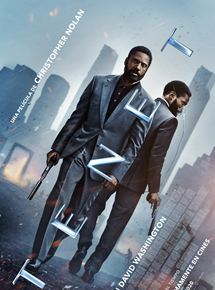

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/08/23/16//19565781_hd_013.mp4
Pinocho


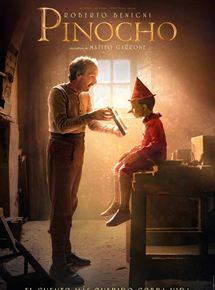

Trailer: http://es.vid.web.acsta.net/nmedia/34/19/07/09/09//19562621_hd_013.mp4
Padre no hay más que uno 2. La llegada de la suegra


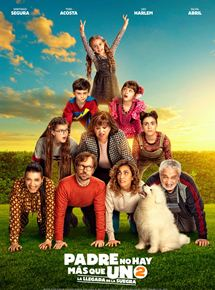

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/02/18/12//19564614_hd_013.mp4
After. En mil pedazos


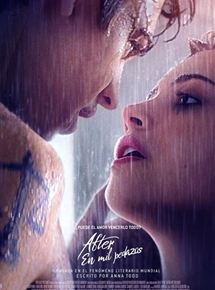

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/02/17/09//19564597_hd_013.mp4
Antebellum


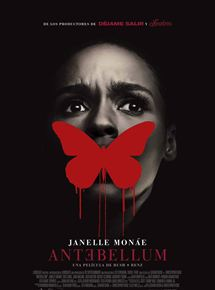

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/07/01/13//19565519_hd_013.mp4
Los Nuevos Mutantes


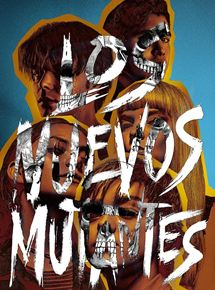

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/01/07/12//19564176_hd_013.mp4
Trasto


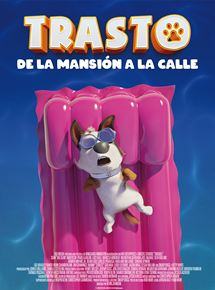

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/02/19/16//19564628_hd_013.mp4
Salir del ropero


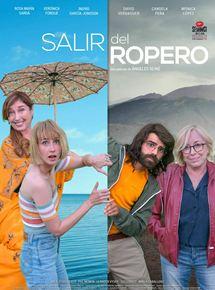

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/09/07/11//19565872_hd_013.mp4
La Boda de Rosa


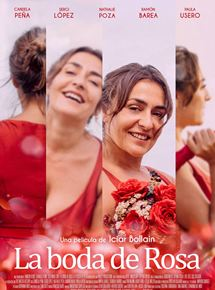

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/06/15/14//19565414_hd_013.mp4
100% Wolf: Pequeño gran lobo


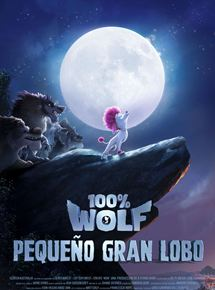

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/09/01/12//19565827_hd_013.mp4
En busca de Summerland


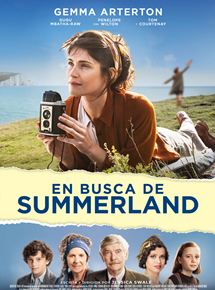

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/07/07/09//19565553_hd_013.mp4
Las niñas


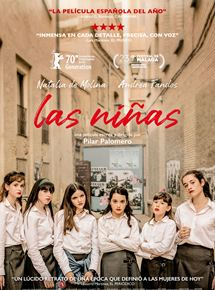

Trailer: http://es.vid.web.acsta.net/nmedia/34/20/02/26/16//19564691_hd_013.mp4


In [257]:
for movie in obj_movies:
    print(movie.title)
    display(Image(movie.image))
    print('Trailer:', 'http:'+movie.trailer)
    print('=============================================================')